# 1 BUSINESS UNDERSTANDING

## 1.1 Project overview

This project aim to build a model that will predict whether a customer is likely to leave SyriaTel soon

## 1.2 Business problem

SyriaTel, a telecommunication firm, is facing a significant issue of customer churn that may adversely affect its revenue and future. The firm should identify the customers who are likely to discontinue using their services and the reasons why they decide to do so. Through this learning, SyriaTel can implement measures to resolve customer problems and prevent them from leaving.

## 1.3 Project objectives

### 1.3.1 Main objective

This project forecasts SyriaTel customer churn by identifying those most likely to stop usage and determines the most significant drivers of churn. This will enable SyriaTel to take proactive measures to retain customers and prevent revenue loss.



### 1.3.2 Specific objectives

1. To identify customer behavour by analyzing day,night calls and their correlation to churn.
2. Analyze customer behavior, usage patterns, and service interactions to determine the main factors influencing churn.
3. To identify how the number of customer service interactions relates to the possibility of customer churn for your business.
4. Provide actionable insights that help SyriaTel implement targeted retention efforts, such as personalized offers or improved customer service.

# 2 DATA UNDERSTANDING

In [1469]:
#importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')



In [1470]:
#load the csv datast
df = pd.read_csv("bigml.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [1471]:
#check the top 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [1472]:
# check the bottom 5 rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [1473]:
#check the shape
print(f"The dataset has records {df.shape[0]} and {df.shape[1]} variables")

The dataset has records 3333 and 21 variables


In [1474]:
#check the dat type
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [1475]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [1476]:
#check column name
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [1477]:
#checking for the statistical information
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [1478]:
#checking for the statistical information with transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


# 3 DATA PREPARATION

## 3.0 Data cleaning

In [1479]:
#missing value
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [1480]:
#duplicate
df.duplicated().sum()

0

Observation: No duplicates.

In [1481]:
##Checking for unique values in the categorical values
df.groupby("churn")["churn"].count()

churn
False    2850
True      483
Name: churn, dtype: int64

In [1482]:
##Checking for unique values in the categorical values
df.groupby("international plan")["international plan"].count()

international plan
no     3010
yes     323
Name: international plan, dtype: int64

In [1483]:
##Checking for unique values in the categorical values
df.groupby("voice mail plan")["voice mail plan"].count()

voice mail plan
no     2411
yes     922
Name: voice mail plan, dtype: int64

In [1484]:
##Drop unnecessary column
del df["phone number"]

In [1485]:
##confirm if the phone number has been removed
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


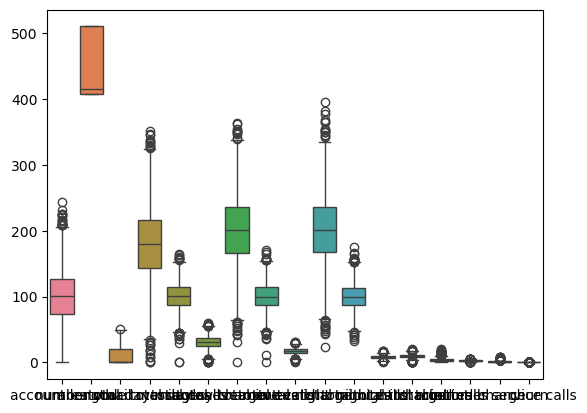

In [1486]:
#checking the outlier
sns.boxplot(df)
plt.show()

In [1487]:
##identify numerical columns except area code
numericals_cols = df.select_dtypes(include=['number']).columns.drop("area code")
numericals_cols

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

In [1488]:
# Caclculating upper Q3 (75th percentile) and lower Q1 (25th percentile) 
Q1 = df[numericals_cols].quantile(0.25)
Q3 = df[numericals_cols].quantile(0.75)
# Calculating interquatile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers (keeping "area code" unchanged)
df_cleaned = df[~((df[numericals_cols] < lower_bound) | (df[numericals_cols] > upper_bound)).any(axis=1)]

In [1489]:
# Save the cleaned dataset
df_cleaned.to_csv("Ashley_cleaned_bigml.csv", index=False)
df_cleaned.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


# 4 EDA

1. Univariate analysis
2. Bivarite analysis
3. Multivariate analysis

In [1490]:
##loading the clean dataset
df2=pd.read_csv("Ashley_cleaned_bigml.csv")
df2

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## 4.1 Univariate analysis

It is the analysis of one variable

### 4.1.1 Analysis of the top ten states

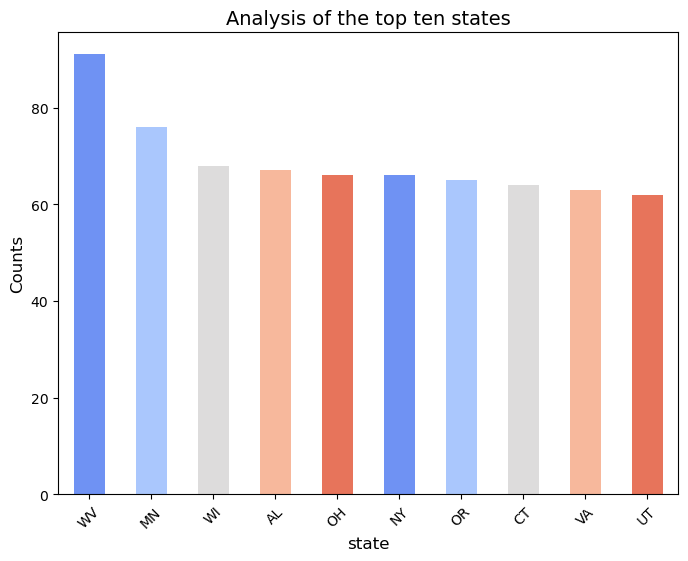

In [1491]:
  # Increased figure size
plt.figure(figsize=(8,6))
  # Changed color palette
sns.set_palette('coolwarm')

df2["state"].value_counts().head(10).plot(kind='bar', figsize=(8,6), color=sns.color_palette('coolwarm', 5))
  # Increased font size
plt.title("Analysis of the top ten states", fontsize=14)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("state", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


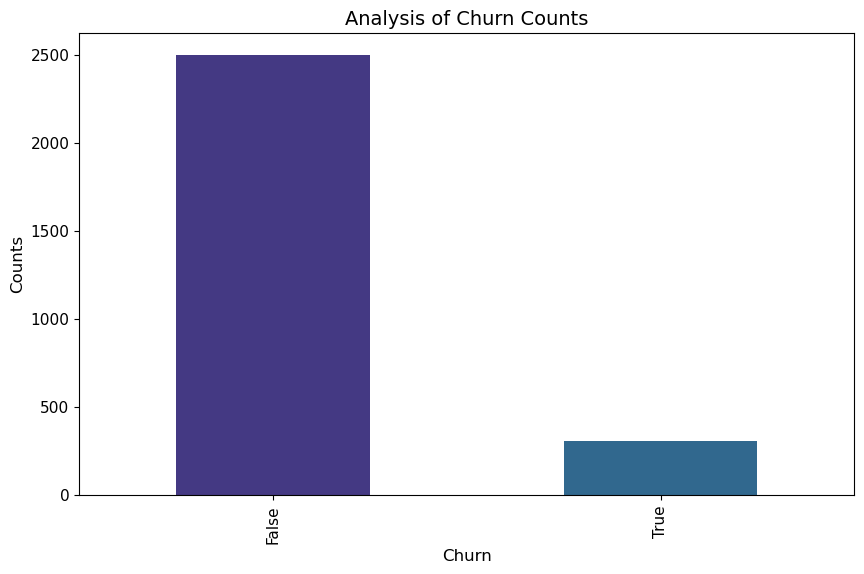

In [1492]:
 # Slightly larger figure size
plt.figure(figsize=(10,6))
  # Changed color palette
sns.set_palette('pastel')

df2["churn"].value_counts().plot(kind='bar', figsize=(10,6), color=sns.color_palette("viridis", 5))

 # Adjusted title style
plt.title("Analysis of Churn Counts", fontsize=14)  # Adjusted title style
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Churn", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()



## 4.2 Bivariate analysis

Its the analysis of two variables.

### 4.2.1 Analysis between state vs total night charge

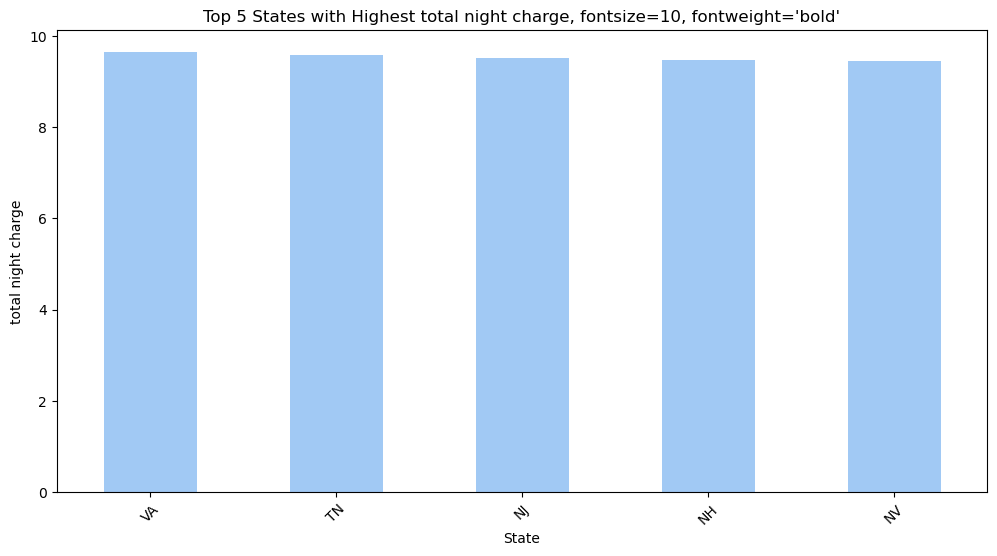

In [1493]:
plt.figure(figsize=(12, 6))
df2.groupby("state")["total night charge"].mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Top 5 States with Highest total night charge, fontsize=10, fontweight='bold'")
plt.ylabel("total night charge")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

### 4.2.2 States vs Account Length

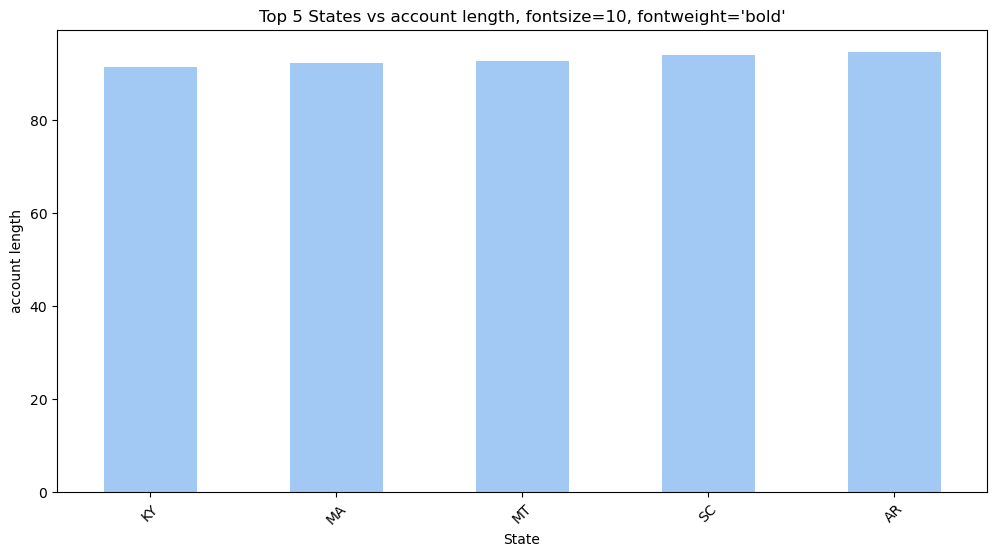

In [1494]:
plt.figure(figsize=(12, 6))
df2.groupby("state")["account length"].mean().sort_values(ascending=True).head(5).plot(kind='bar')
plt.title("Top 5 States vs account length, fontsize=10, fontweight='bold'")
plt.ylabel("account length")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

### 4.2.3 State vs Area Code

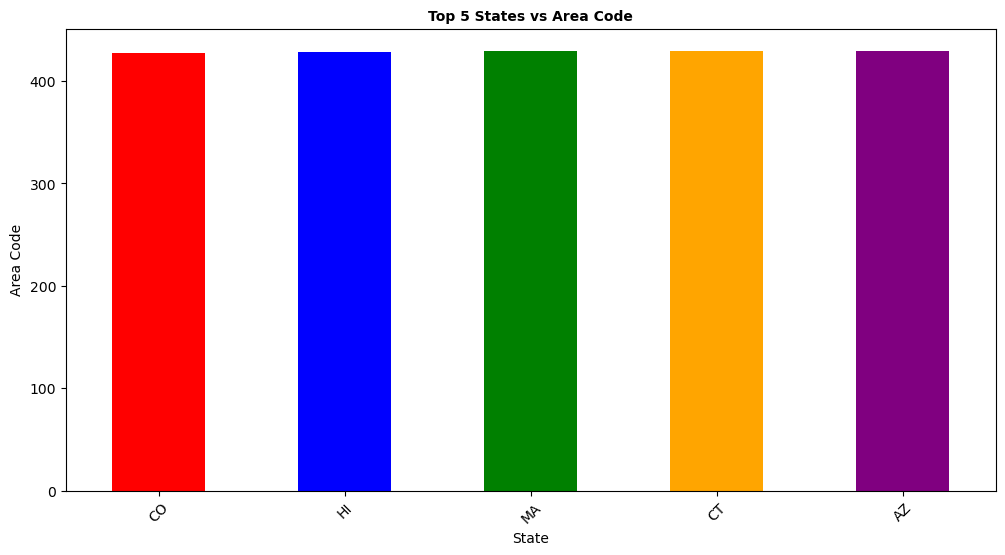

In [1495]:
plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
df2.groupby("state")["area code"].mean().sort_values(ascending=True).head(5).plot(kind='bar', color=colors)
plt.title("Top 5 States vs Area Code", fontsize=10, fontweight='bold')
plt.ylabel("Area Code")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()



### 4.2.4 State vs Total day charge

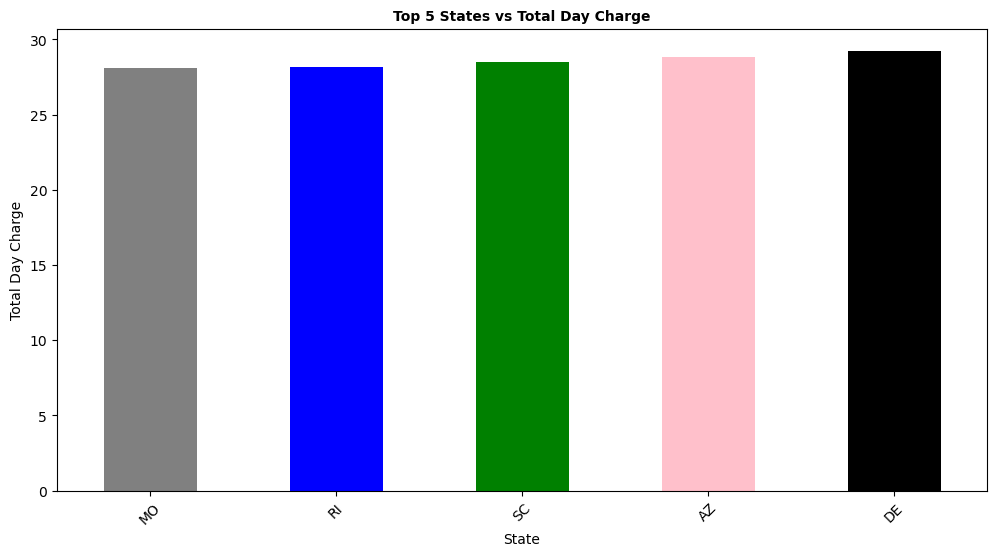

In [1496]:
plt.figure(figsize=(12, 6))
colors = ['grey', 'blue', 'green', 'pink', 'black'] 
df2.groupby("state")["total day charge"].mean().sort_values(ascending=True).head(5).plot(kind='bar', color=colors)
plt.title("Top 5 States vs Total Day Charge", fontsize=10, fontweight='bold')
plt.ylabel("Total Day Charge")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

### 4.2.5 State vs Total Intl Calls

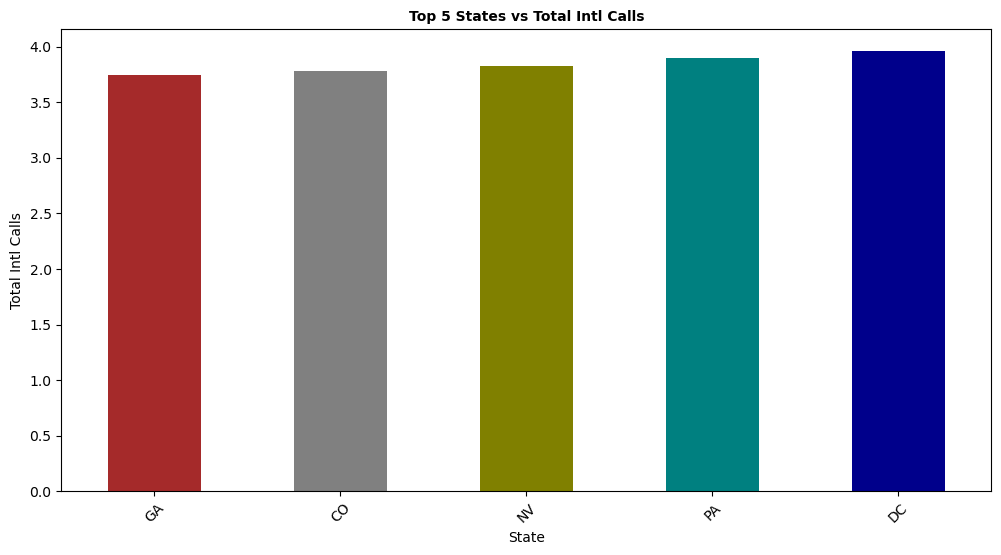

In [1497]:
plt.figure(figsize=(12, 6))
colors = ['brown', 'gray', 'olive', 'teal', 'darkblue']
df2.groupby("state")["total intl calls"].mean().sort_values(ascending=True).head(5).plot(kind='bar', color=colors)
plt.title("Top 5 States vs Total Intl Calls", fontsize=10, fontweight='bold')
plt.ylabel("Total Intl Calls")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()


### 4.2.6 Churn vs International Plan

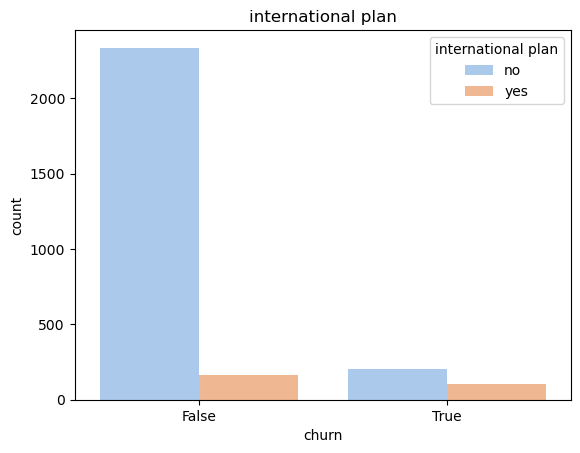

international plan,no,yes
churn,,
False,2335,164
True,201,104


In [1498]:
sns.countplot(x=df2["churn"],hue=df2["international plan"], palette="pastel")
plt.title("international plan")
plt.show()
cort=pd.crosstab(df2["churn"],df2["international plan"])
cort

### 4.2.7 Analysis of the total night minutes vs total night charge

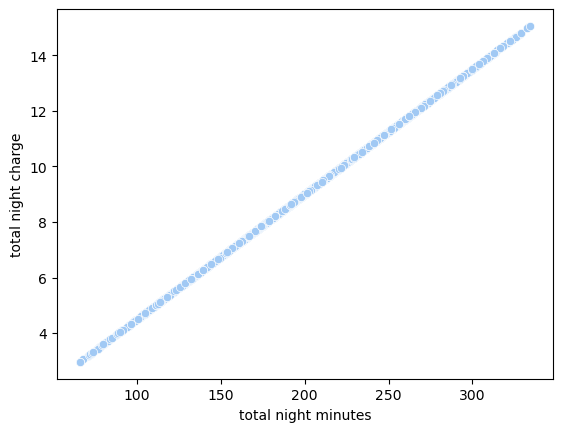

In [1499]:
sns.scatterplot(data=df2, x='total night minutes', y='total night charge');

## 4.3  Multivariate analysis

It is the analysis of more than two variables

### 4.3.1 Analysis of the international plan,'total intl minutes and churn

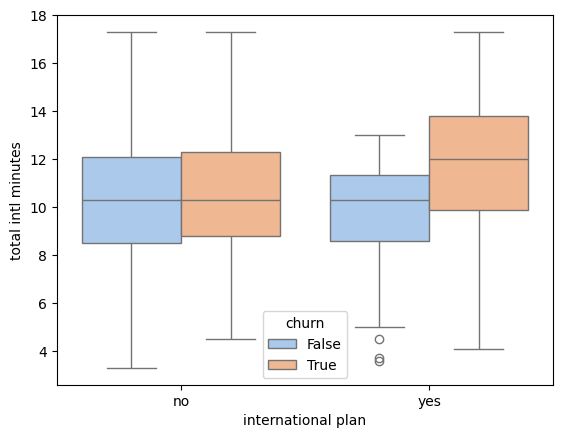

In [1500]:
sns.boxplot(data=df2, x='international plan', y='total intl minutes', hue='churn',palette='pastel')
plt.legend
plt.show()

## 5. MODELING

Models that will be used are
1. Logistic regression
2. Decision tree

### 5.1 LOGISTIC REGRESSION

#### with imbalanced class

In [1501]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [1502]:
#load the dataset
df3=pd.read_csv("Ashley_cleaned_bigml.csv")
df3

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


churn
False    2499
True      305
Name: count, dtype: int64


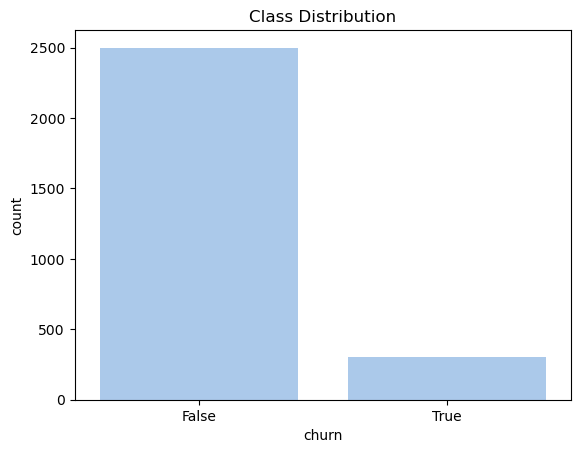

In [1503]:
#Display class distribution
print(df3['churn'].value_counts())

# Plot class distribution
sns.countplot(x='churn', data=df3)
plt.title('Class Distribution')
plt.show()

#### 5.1.1 Preprocessing

It is the changing of categorical variable to numerical variable

In [1504]:
df3 = pd.read_csv("Ashley_cleaned_bigml.csv", dtype={"international plan": str, "voice mail plan": str})
df3

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [1505]:
#Drop state because it has too many categorical variables
df3.drop(columns=['state'], inplace=True)

In [1506]:
#confirm if state has been removed
df3.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [1507]:
#converting categorical variables to numbers
df3['international plan'] = df3['international plan'].map({'no': 1, 'yes': 2})
df3['voice mail plan'] = df3['voice mail plan'].map({'no': 1, 'yes': 2})
# Convert False/True to 1/2
df3['churn'] = df3['churn'].astype(int)  

In [1508]:
#confirming if they have changed to numeric
df3.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,1,2,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,1,2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,415,2,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,118,510,2,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


#### 5.1.2 Splitting data into target and predictors

In [1509]:
x=df3.drop("churn",axis=1)
y=df3["churn"]

In [1510]:
#confirming if churn has been removed
x

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,1,2,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,1,2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,75,415,2,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,118,510,2,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,192,415,1,2,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2800,68,415,1,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2801,28,510,1,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
2802,184,510,2,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### 5.1.3 split the data into train,test and split


In [1511]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### 5.1.4 Scalling 

In [1512]:
##We scale only the features not target
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

#### 5.1.5 Build the model

In [1513]:
model = LogisticRegression()
model.fit (x_train_sc,y_train)

LogisticRegression()

#### 5.1.6 Predict Y

In [1514]:
y_predict=model.predict(x_test_sc)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1515]:
##the original
y

0       0
1       0
2       0
3       0
4       0
       ..
2799    0
2800    0
2801    0
2802    0
2803    0
Name: churn, Length: 2804, dtype: int32

#### 5.1.7 The accuracy

In [1516]:
##We can check the model accuracy and round off to the nearest 4
round(accuracy_score(y_test,y_predict),4) *100

88.59

In [1517]:
confusion_matrix(y_test,y_predict)

array([[474,  14],
       [ 50,  23]], dtype=int64)

Dbservation;
* 474 is a true positive
* 23 is a true negative
* 14 is a false positive 
* 50 is a false negative

### 5.1.8 Logistic regression(with balanced class)/SMOTE Technique

In [1518]:
# call SMOTE
smote = SMOTE(random_state=42)


In [1519]:

# Apply SMOTE to the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print('Class distribution after SMOTE:')
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
churn
0    2011
1    2011
Name: count, dtype: int64


Observation: The class is balanced

#### 5.2.1 Build and Evaluate a Model After Addressing Imbalance

In [1520]:
# call the Logistic Regression model
smote_model = LogisticRegression()


In [1521]:
# Train the model on the SMOTE data
smote_model.fit(x_train_smote, y_train_smote)


LogisticRegression()

In [1522]:
# Make predictions
y_pred_smote = smote_model.predict(x_test)


In [1523]:
# Accuracy
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f'SMOTE Model Accuracy: {accuracy_smote:.4f}')


SMOTE Model Accuracy: 0.6809


In [1524]:
# Classification Report
print('SMOTE Model Classification Report:')
print(classification_report(y_test, y_pred_smote))


SMOTE Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.79       488
           1       0.25      0.75      0.38        73

    accuracy                           0.68       561
   macro avg       0.60      0.71      0.58       561
weighted avg       0.86      0.68      0.73       561



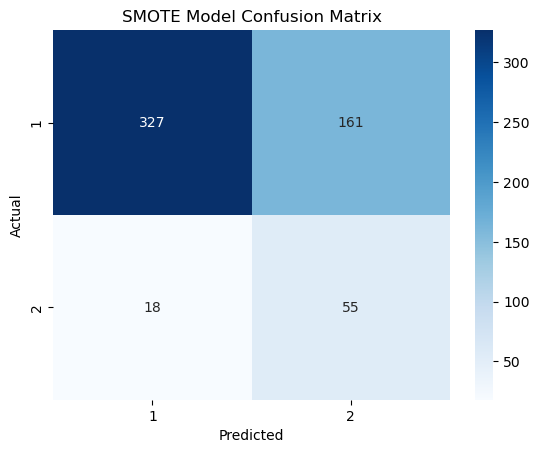

In [1525]:
# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2'], yticklabels=['1', '2'])
plt.title('SMOTE Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.2 DECISION TREE

In [1526]:
##loading the dataset
df4=pd.read_csv("Ashley_cleaned_bigml.csv")
df4

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### 5.2.1 Preprocessing

In [1527]:
df4 = pd.read_csv("Ashley_cleaned_bigml.csv", dtype={"international plan": str, "voice mail plan": str})
df4

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [1528]:
#Drop state because it has too many categorical variables
df4.drop(columns=['state'], inplace=True)

In [1529]:
#confirm if state has been removed
df4.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [1530]:
#converting categorical variables to numbers
df4['international plan'] = df4['international plan'].map({'no': 1, 'yes': 2})
df4['voice mail plan'] = df4['voice mail plan'].map({'no': 1, 'yes': 2})
# Convert False/True to 1/2
df4['churn'] = df4['churn'].astype(int)  

In [1531]:
#confirming if they have changed to numeric
df4.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,1,2,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,1,2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,415,2,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,118,510,2,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


#### 5.2.2 Divide target and predictor 


In [1532]:
#divide target and predictor 
x = df4.drop("churn", axis=1)
y = df4["churn"]

In [1533]:
x

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,1,2,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,1,2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,75,415,2,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,118,510,2,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,192,415,1,2,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2800,68,415,1,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2801,28,510,1,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
2802,184,510,2,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### 5.2.3 Split dataset into train and test

In [1534]:
#split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

#### 5.2.4 Cheking Shape

In [1535]:
print(x_train.shape,x_test.shape)
print(y_train.shape, y_test.shape)

(1962, 18) (842, 18)
(1962,) (842,)


#### 5.2.5 Modeling

In [1536]:
#modeling
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
#train
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### 5.2.6 Predict the first index

In [1537]:
#predict the first index
y_pred = model.predict(x_test)
y_pred[0]

0

In [1538]:
#The original value of the first index
y[0]

0

#### 5.2.7 Accuracy

In [1539]:
#accuracy
print(f"The accuracy score is {accuracy_score(y_test, y_pred)*100}", "%")

The accuracy score is 90.02375296912113 %


#### 5.2.8 Confusion matrix

In [1540]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[723  21]
 [ 63  35]]


Observation:
* 708 is a true positive
* 61 is a true negative
* 37 is a false negative
* 36 is a false positive

#### 5.2.9 Report

In [1541]:
#report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       744
           1       0.62      0.36      0.45        98

    accuracy                           0.90       842
   macro avg       0.77      0.66      0.70       842
weighted avg       0.89      0.90      0.89       842



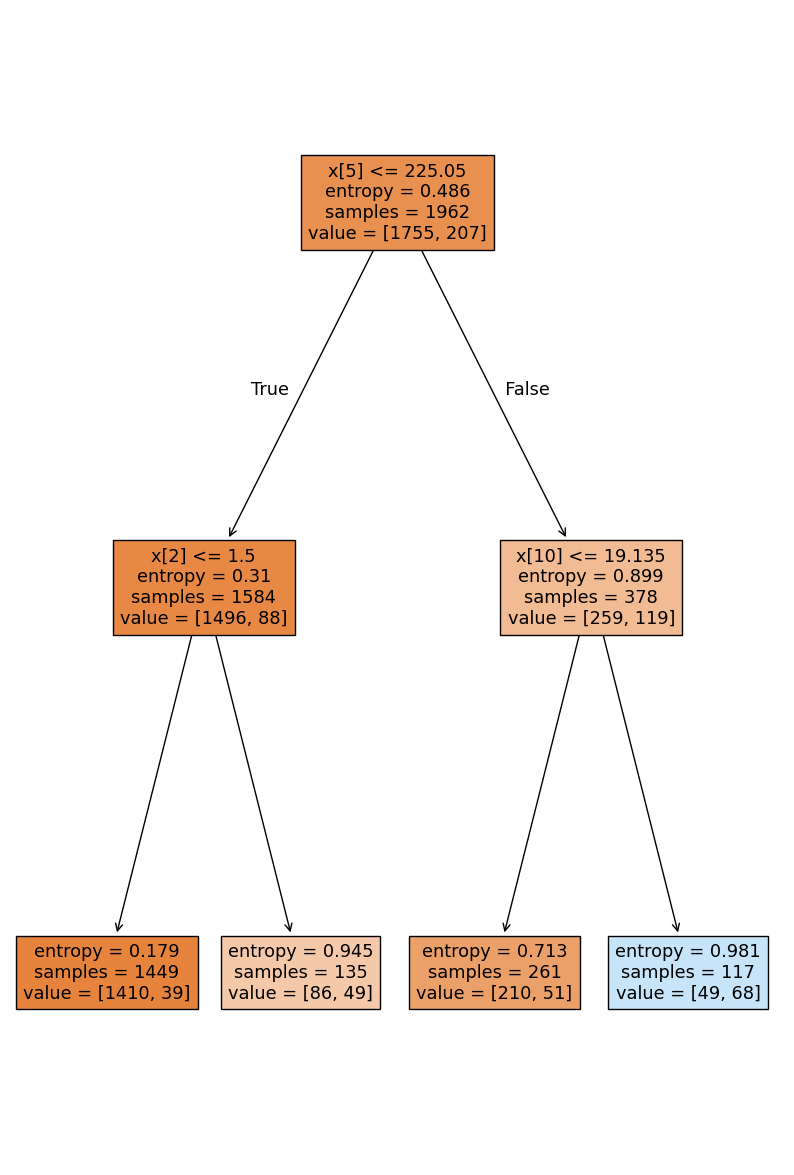

In [1542]:
#visualizations
plt.figure(figsize= (10,15))
tree.plot_tree(model, filled= True)
plt.show()


# 6 EVALUATION

Decision tree is the best model to use because it has an accuracy of 94% compared to logistic with an accuracy of 68%